[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kaushikreddym/climdata/blob/main/docs/examples/datasets/multi_dataset_comparison.ipynb)

In [1]:
# Uncomment to install climdata in Google Colab or other environments
# !pip install climdata matplotlib seaborn

# Multi-Dataset Comparison: CMIP, NEX-GDDP, MSWX, and HYRAS

This notebook demonstrates how to extract and compare climate data from multiple sources:
- **CMIP6**: 3 different climate models (ACCESS-CM2, MIROC6, MPI-ESM1-2-LR)
- **NEX-GDDP**: NASA's downscaled CMIP6 dataset
- **MSWX**: Multi-Source Weather (MSWX) dataset
- **HYRAS**: High-resolution gridded dataset for Germany

**Location**: Berlin, Germany (52.5°N, 13.4°E)

**Variables**: Maximum temperature (tasmax) and precipitation (pr)

**Time Period**: Historical period for comparison

## 1️⃣ Imports and Setup

In [1]:
from climdata import ClimData
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Berlin coordinates
LAT_BERLIN = 52.5
LON_BERLIN = 13.4

## 2️⃣ Define Time Range and Variables

In [2]:
# Time range for comparison (adjust as needed)
START_DATE = "2010-01-01"
END_DATE = "2014-12-31"

# Variables to compare
VARIABLES = ["tasmax", "pr"]

# CMIP6 models to compare
CMIP_MODELS = ["ACCESS-CM2", "MIROC6", "MPI-ESM1-2-LR"]

print(f"Comparing data for Berlin ({LAT_BERLIN}°N, {LON_BERLIN}°E)")
print(f"Time period: {START_DATE} to {END_DATE}")
print(f"Variables: {', '.join(VARIABLES)}")
print(f"CMIP6 Models: {', '.join(CMIP_MODELS)}")

Comparing data for Berlin (52.5°N, 13.4°E)
Time period: 2010-01-01 to 2014-12-31
Variables: tasmax, pr
CMIP6 Models: ACCESS-CM2, MIROC6, MPI-ESM1-2-LR


## 3️⃣ Extract Data from CMIP6 Models

We'll extract data from three different CMIP6 models using the historical experiment.

In [3]:
# Dictionary to store all datasets
datasets = {}
dataframes = {}

# Extract data from each CMIP6 model
for model in CMIP_MODELS:
    print(f"Extracting CMIP6 - {model}")
    
    overrides = [
        "dataset=cmip",
        f"lat={LAT_BERLIN}",
        f"lon={LON_BERLIN}",
        f"time_range.start_date={START_DATE}",
        f"time_range.end_date={END_DATE}",
        f"variables={VARIABLES}",
        "experiment_id=historical",
        f"source_id={model}",
    ]
    
    extractor = ClimData(overrides=overrides)
    ds = extractor.extract()
    df = extractor.to_dataframe(ds)
    
    # Store results
    datasets[f"CMIP6_{model}"] = ds
    dataframes[f"CMIP6_{model}"] = df

Extracting CMIP6 - ACCESS-CM2


/home/muduchuru/miniforge3/envs/sdba/lib/python3.10/site-packages/intake_esm/core.py:475: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cat = self.__class__({'esmcat': self.esmcat.dict(), 'df': esmcat_results})
/home/muduchuru/miniforge3/envs/sdba/lib/python3.10/site-packages/intake_esm/core.py:475: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cat = self.__class__({'esmcat': self.esmcat.dict(), 'df': esmcat_results})


Extracting CMIP6 - MIROC6


/home/muduchuru/miniforge3/envs/sdba/lib/python3.10/site-packages/intake_esm/core.py:475: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cat = self.__class__({'esmcat': self.esmcat.dict(), 'df': esmcat_results})
/home/muduchuru/miniforge3/envs/sdba/lib/python3.10/site-packages/intake_esm/core.py:475: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cat = self.__class__({'esmcat': self.esmcat.dict(), 'df': esmcat_results})


Extracting CMIP6 - MPI-ESM1-2-LR


/home/muduchuru/miniforge3/envs/sdba/lib/python3.10/site-packages/intake_esm/core.py:475: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cat = self.__class__({'esmcat': self.esmcat.dict(), 'df': esmcat_results})
/home/muduchuru/miniforge3/envs/sdba/lib/python3.10/site-packages/intake_esm/core.py:475: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  cat = self.__class__({'esmcat': self.esmcat.dict(), 'df': esmcat_results})


<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


## 4️⃣ Extract Data from NEX-GDDP

NEX-GDDP provides downscaled and bias-corrected CMIP6 projections.

In [6]:
# Extract NEX-GDDP data for the same models
for model in CMIP_MODELS:
    print(f"Extracting NEX-GDDP - {model}")
    
    overrides = [
        "dataset=nexgddp",
        f"lat={LAT_BERLIN}",
        f"lon={LON_BERLIN}",
        f"time_range.start_date={START_DATE}",
        f"time_range.end_date={END_DATE}",
        f"variables={VARIABLES}",
        "data_dir=/beegfs/muduchuru/data",
        "experiment_id=historical",
        f"source_id={model}",
    ]
    
    extractor = ClimData(overrides=overrides)
    ds = extractor.extract()
    df = extractor.to_dataframe(ds)
    
    # Store results
    datasets[f"NEXGDDP_{model}"] = ds
    dataframes[f"NEXGDDP_{model}"] = df

Extracting NEX-GDDP - ACCESS-CM2
🔍 Auto-discovering metadata for ACCESS-CM2/historical...
   Checking available realizations...
   ✓ Found: r1i1p1f1 (grid: gn)
✓ Discovered grid_label: gn
🔍 Downloading NEX-GDDP-CMIP6 data from NASA THREDDS...
   Model: ACCESS-CM2, Experiment: historical

📥 Fetching tasmax (Daily Maximum Near-Surface Air Temperature)...



📥 Fetching pr (Precipitation)...



✅ Downloaded 10 files
📂 Loading 10 NEX-GDDP files...
  Loading tasmax from 5 file(s)...
  Loading pr from 5 file(s)...
✅ Loaded dataset with 2 variables
Extracting NEX-GDDP - MIROC6
🔍 Auto-discovering metadata for MIROC6/historical...
   Checking available realizations...
   ✓ Found: r1i1p1f1 (grid: gn)
✓ Discovered grid_label: gn
🔍 Downloading NEX-GDDP-CMIP6 data from NASA THREDDS...
   Model: MIROC6, Experiment: historical

📥 Fetching tasmax (Daily Maximum Near-Surface Air Temperature)...



📥 Fetching pr (Precipitation)...



✅ Downloaded 10 files
📂 Loading 10 NEX-GDDP files...
  Loading tasmax from 5 file(s)...
  Loading pr from 5 file(s)...
✅ Loaded dataset with 2 variables
Extracting NEX-GDDP - MPI-ESM1-2-LR
🔍 Auto-discovering metadata for MPI-ESM1-2-LR/historical...
   Checking available realizations...
   ✓ Found: r1i1p1f1 (grid: gn)
✓ Discovered grid_label: gn
🔍 Downloading NEX-GDDP-CMIP6 data from NASA THREDDS...
   Model: MPI-ESM1-2-LR, Experiment: historical

📥 Fetching tasmax (Daily Maximum Near-Surface Air Temperature)...



📥 Fetching pr (Precipitation)...



✅ Downloaded 10 files
📂 Loading 10 NEX-GDDP files...
  Loading tasmax from 5 file(s)...
  Loading pr from 5 file(s)...
✅ Loaded dataset with 2 variables


## 5️⃣ Extract Data from MSWX

MSWX provides merged satellite and reanalysis data.

In [7]:
print(f"Extracting MSWX")

mswx_overrides = [
    "dataset=mswx",
    f"lat={LAT_BERLIN}",
    f"lon={LON_BERLIN}",
    f"time_range.start_date={START_DATE}",
    f"time_range.end_date={END_DATE}",
    f"variables={VARIABLES}",
    "data_dir=/beegfs/muduchuru/data",
    # Uncomment if you need Google service account for MSWX
    "dsinfo.mswx.params.google_service_account=./.climdata_conf/service.json",
]


extractor_mswx = ClimData(overrides=mswx_overrides)
ds_mswx = extractor_mswx.extract()
df_mswx = extractor_mswx.to_dataframe(ds_mswx)

datasets["MSWX"] = ds_mswx
dataframes["MSWX"] = df_mswx

print(f"✅ Successfully extracted MSWX")
print(f"   Shape: {ds_mswx.dims}")


Extracting MSWX
✅ All 1826 tasmax files already exist locally.
✅ All 1826 pr files already exist locally.
✅ Successfully extracted MSWX
   Shape: FrozenMappingWarningOnValuesAccess({'time': 1826})


## 6️⃣ Extract Data from HYRAS

HYRAS provides high-resolution gridded data specifically for Germany.

In [8]:
print(f"Extracting HYRAS")

hyras_overrides = [
    "dataset=hyras",
    f"lat={LAT_BERLIN}",
    f"lon={LON_BERLIN}",
    f"time_range.start_date={START_DATE}",
    f"time_range.end_date={END_DATE}",
    f"variables={VARIABLES}",
    "data_dir=/beegfs/muduchuru/data",
]

extractor_hyras = ClimData(overrides=hyras_overrides)
ds_hyras = extractor_hyras.extract()
df_hyras = extractor_hyras.to_dataframe(ds_hyras)

datasets["HYRAS"] = ds_hyras
dataframes["HYRAS"] = df_hyras

Extracting HYRAS
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_1_2010_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TASMAX/tasmax_hyras_1_2010_v6-0_de.nc
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_1_2011_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TASMAX/tasmax_hyras_1_2011_v6-0_de.nc
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_1_2012_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TASMAX/tasmax_hyras_1_2012_v6-0_de.nc
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_1_2013_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TASMAX/tasmax_hyras_1_2013_v6-0_de.nc
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids

## Prepare Data for Comparison

Combine all dataframes and prepare for visualization.

In [9]:
# Add source column to each dataframe and combine
combined_dfs = []

for source_name, df in dataframes.items():
    df_copy = df.copy()
    df_copy['source'] = source_name
    combined_dfs.append(df_copy)

# Combine all dataframes
df_all = pd.concat(combined_dfs, ignore_index=True)

# Ensure time is datetime
if 'time' in df_all.columns:
    df_all['time'] = pd.to_datetime(df_all['time'])

print(f"Combined dataset shape: {df_all.shape}")
print(f"\nDataset sources: {df_all['source'].unique().tolist()}")
print(f"Variables: {df_all['variable'].unique().tolist() if 'variable' in df_all.columns else 'N/A'}")

df_all.head()

Combined dataset shape: (29216, 8)

Dataset sources: ['CMIP6_ACCESS-CM2', 'CMIP6_MIROC6', 'CMIP6_MPI-ESM1-2-LR', 'NEXGDDP_ACCESS-CM2', 'NEXGDDP_MIROC6', 'NEXGDDP_MPI-ESM1-2-LR', 'MSWX', 'HYRAS']
Variables: ['tasmax', 'pr']


,time,lat,lon,variable,value,units,source_id,source
0,2010-01-01,53.125,14.0625,tasmax,6.929352,°C,ACCESS-CM2,CMIP6_ACCESS-CM2
1,2010-01-02,53.125,14.0625,tasmax,4.574371,°C,ACCESS-CM2,CMIP6_ACCESS-CM2
2,2010-01-03,53.125,14.0625,tasmax,11.116364,°C,ACCESS-CM2,CMIP6_ACCESS-CM2
3,2010-01-04,53.125,14.0625,tasmax,6.485016,°C,ACCESS-CM2,CMIP6_ACCESS-CM2
4,2010-01-05,53.125,14.0625,tasmax,4.042877,°C,ACCESS-CM2,CMIP6_ACCESS-CM2


## Visualize Maximum Temperature (tasmax) Comparison

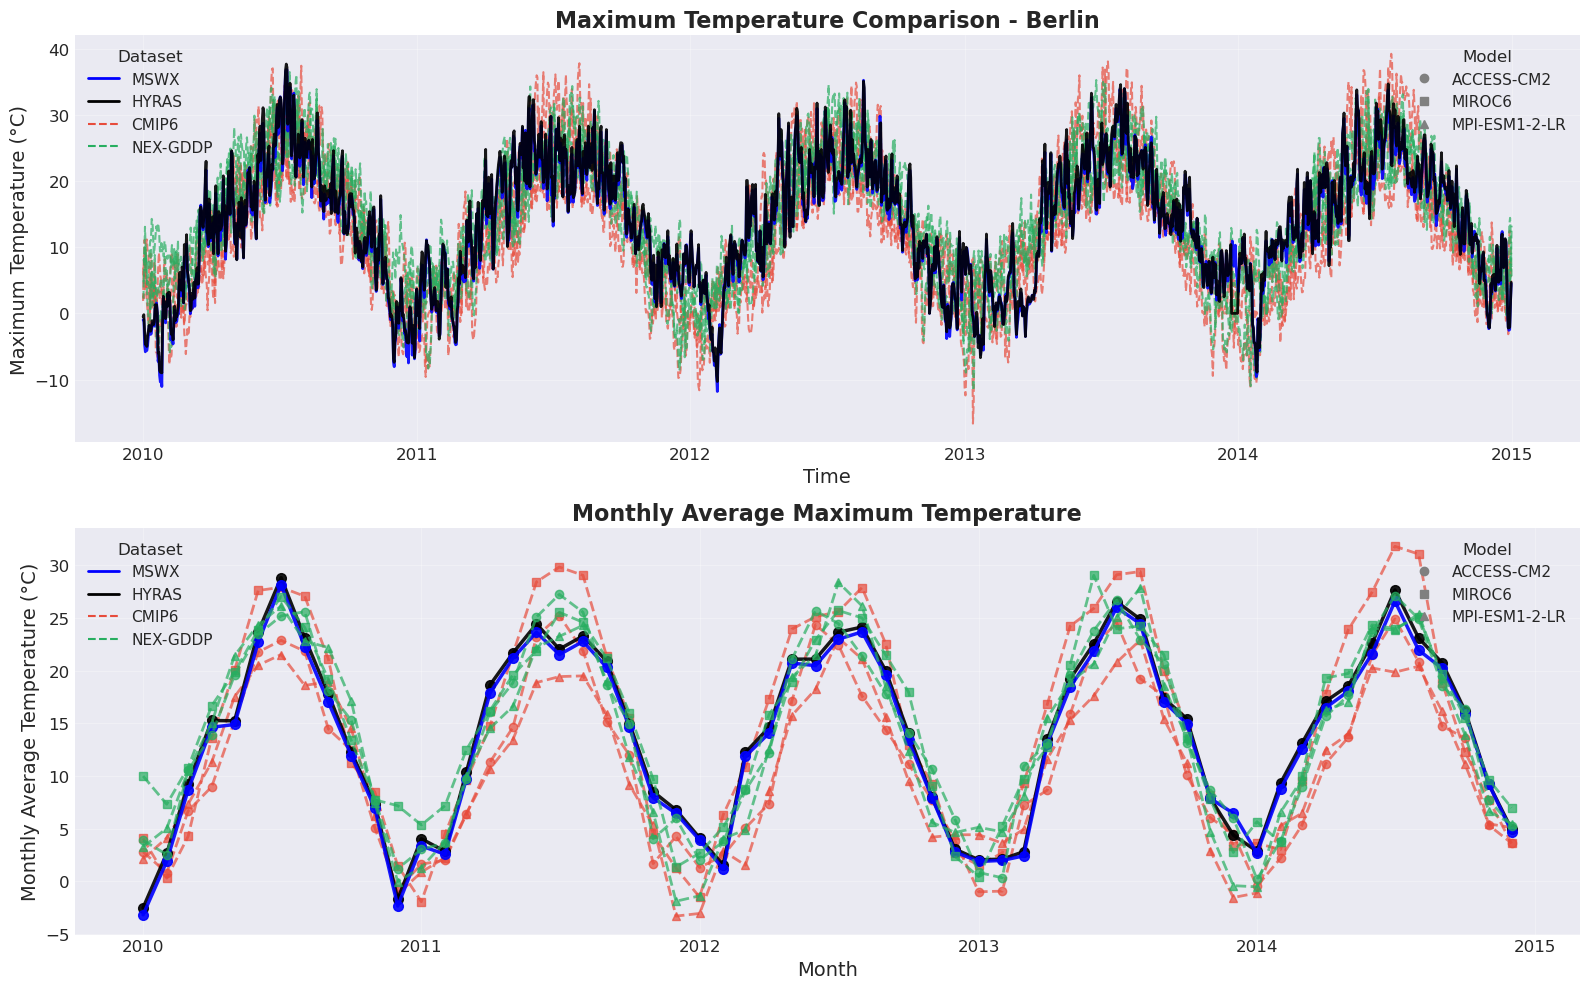

In [12]:
# Filter for tasmax
df_tasmax = df_all[df_all['variable'] == 'tasmax'].copy()

# Define colors for datasets and markers for models
dataset_colors = {
    'MSWX': 'blue',
    'HYRAS': 'black',
    'CMIP6': '#E74C3C',      # Red-orange for CMIP6
    'NEXGDDP': '#27AE60'     # Green for NEX-GDDP
}

model_markers = {
    'ACCESS-CM2': 'o',
    'MIROC6': 's',
    'MPI-ESM1-2-LR': '^'
}

# Create color and marker mapping
color_map = {}
marker_map = {}

for source in df_tasmax['source'].unique():
    if source == 'MSWX':
        color_map[source] = dataset_colors['MSWX']
        marker_map[source] = 'o'
    elif source == 'HYRAS':
        color_map[source] = dataset_colors['HYRAS']
        marker_map[source] = 'o'
    elif source.startswith('CMIP6_'):
        model = source.replace('CMIP6_', '')
        color_map[source] = dataset_colors['CMIP6']
        marker_map[source] = model_markers[model]
    elif source.startswith('NEXGDDP_'):
        model = source.replace('NEXGDDP_', '')
        color_map[source] = dataset_colors['NEXGDDP']
        marker_map[source] = model_markers[model]

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Time series
for source in df_tasmax['source'].unique():
    data = df_tasmax[df_tasmax['source'] == source]
    is_obs = source in ['MSWX', 'HYRAS']
    linestyle = '-' if is_obs else '--'
    linewidth = 2 if is_obs else 1.5
    alpha = 0.9 if is_obs else 0.7
    axes[0].plot(data['time'], data['value'],
                 color=color_map[source], alpha=alpha, 
                 linewidth=linewidth, linestyle=linestyle)

axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Maximum Temperature (°C)', fontsize=14)
axes[0].set_title('Maximum Temperature Comparison - Berlin', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=12)

# Create custom legend for datasets (colors)
from matplotlib.lines import Line2D
dataset_handles = [
    Line2D([0], [0], color=dataset_colors['MSWX'], linewidth=2, linestyle='-', label='MSWX'),
    Line2D([0], [0], color=dataset_colors['HYRAS'], linewidth=2, linestyle='-', label='HYRAS'),
    Line2D([0], [0], color=dataset_colors['CMIP6'], linewidth=1.5, linestyle='--', label='CMIP6'),
    Line2D([0], [0], color=dataset_colors['NEXGDDP'], linewidth=1.5, linestyle='--', label='NEX-GDDP')
]
legend1 = axes[0].legend(handles=dataset_handles, loc='upper left', fontsize=11, title='Dataset', title_fontsize=12, framealpha=0.9)
axes[0].add_artist(legend1)

# Create custom legend for models (markers)
model_handles = [
    Line2D([0], [0], color='gray', marker='o', linestyle='None', markersize=6, label='ACCESS-CM2'),
    Line2D([0], [0], color='gray', marker='s', linestyle='None', markersize=6, label='MIROC6'),
    Line2D([0], [0], color='gray', marker='^', linestyle='None', markersize=6, label='MPI-ESM1-2-LR')
]
axes[0].legend(handles=model_handles, loc='upper right', fontsize=11, title='Model', title_fontsize=12, framealpha=0.9)

axes[0].grid(True, alpha=0.3)

# Plot 2: Monthly averages
df_tasmax['year_month'] = df_tasmax['time'].dt.to_period('M')
monthly_avg = df_tasmax.groupby(['source', 'year_month'])['value'].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp()

for source in monthly_avg['source'].unique():
    data = monthly_avg[monthly_avg['source'] == source]
    is_obs = source in ['MSWX', 'HYRAS']
    linestyle = '-' if is_obs else '--'
    linewidth = 2.5 if is_obs else 2
    markersize = 7 if is_obs else 6
    alpha = 0.9 if is_obs else 0.7
    axes[1].plot(data['year_month'], data['value'],
                 color=color_map[source], alpha=alpha, 
                 linewidth=linewidth, linestyle=linestyle,
                 marker=marker_map[source], markersize=markersize)

axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Monthly Average Temperature (°C)', fontsize=14)
axes[1].set_title('Monthly Average Maximum Temperature', fontsize=16, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=12)

# Create custom legend for datasets (colors)
legend1 = axes[1].legend(handles=dataset_handles, loc='upper left', fontsize=11, title='Dataset', title_fontsize=12, framealpha=0.9)
axes[1].add_artist(legend1)

# Create custom legend for models (markers)
axes[1].legend(handles=model_handles, loc='upper right', fontsize=11, title='Model', title_fontsize=12, framealpha=0.9)

axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔟 Visualize Precipitation (pr) Comparison

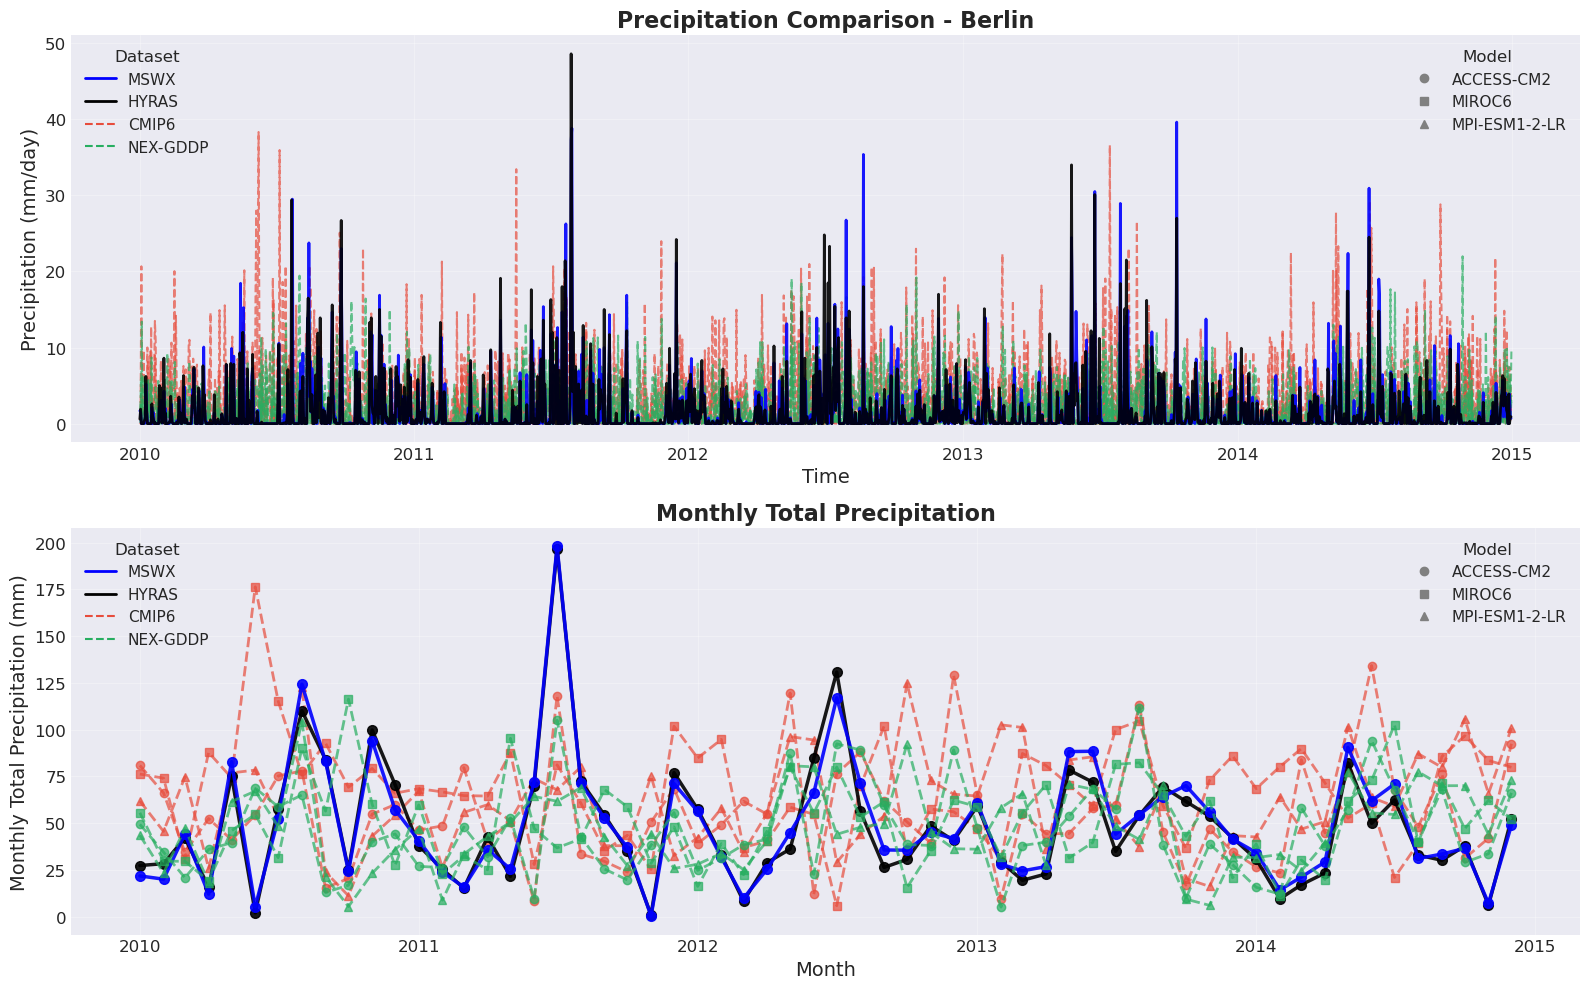

In [13]:
# Filter for precipitation
df_pr = df_all[df_all['variable'] == 'pr'].copy()

# Use same color and marker mapping
color_map_pr = {}
marker_map_pr = {}

for source in df_pr['source'].unique():
    if source == 'MSWX':
        color_map_pr[source] = dataset_colors['MSWX']
        marker_map_pr[source] = 'o'
    elif source == 'HYRAS':
        color_map_pr[source] = dataset_colors['HYRAS']
        marker_map_pr[source] = 'o'
    elif source.startswith('CMIP6_'):
        model = source.replace('CMIP6_', '')
        color_map_pr[source] = dataset_colors['CMIP6']
        marker_map_pr[source] = model_markers[model]
    elif source.startswith('NEXGDDP_'):
        model = source.replace('NEXGDDP_', '')
        color_map_pr[source] = dataset_colors['NEXGDDP']
        marker_map_pr[source] = model_markers[model]

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Time series
for source in df_pr['source'].unique():
    data = df_pr[df_pr['source'] == source]
    is_obs = source in ['MSWX', 'HYRAS']
    linestyle = '-' if is_obs else '--'
    linewidth = 2 if is_obs else 1.5
    alpha = 0.9 if is_obs else 0.7
    axes[0].plot(data['time'], data['value'],
                 color=color_map_pr[source], alpha=alpha, 
                 linewidth=linewidth, linestyle=linestyle)

axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Precipitation (mm/day)', fontsize=14)
axes[0].set_title('Precipitation Comparison - Berlin', fontsize=16, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=12)

# Create custom legend for datasets (colors)
from matplotlib.lines import Line2D
dataset_handles = [
    Line2D([0], [0], color=dataset_colors['MSWX'], linewidth=2, linestyle='-', label='MSWX'),
    Line2D([0], [0], color=dataset_colors['HYRAS'], linewidth=2, linestyle='-', label='HYRAS'),
    Line2D([0], [0], color=dataset_colors['CMIP6'], linewidth=1.5, linestyle='--', label='CMIP6'),
    Line2D([0], [0], color=dataset_colors['NEXGDDP'], linewidth=1.5, linestyle='--', label='NEX-GDDP')
]
legend1 = axes[0].legend(handles=dataset_handles, loc='upper left', fontsize=11, title='Dataset', title_fontsize=12, framealpha=0.9)
axes[0].add_artist(legend1)

# Create custom legend for models (markers)
model_handles = [
    Line2D([0], [0], color='gray', marker='o', linestyle='None', markersize=6, label='ACCESS-CM2'),
    Line2D([0], [0], color='gray', marker='s', linestyle='None', markersize=6, label='MIROC6'),
    Line2D([0], [0], color='gray', marker='^', linestyle='None', markersize=6, label='MPI-ESM1-2-LR')
]
axes[0].legend(handles=model_handles, loc='upper right', fontsize=11, title='Model', title_fontsize=12, framealpha=0.9)

axes[0].grid(True, alpha=0.3)

# Plot 2: Monthly totals
df_pr['year_month'] = df_pr['time'].dt.to_period('M')
monthly_total = df_pr.groupby(['source', 'year_month'])['value'].sum().reset_index()
monthly_total['year_month'] = monthly_total['year_month'].dt.to_timestamp()

for source in monthly_total['source'].unique():
    data = monthly_total[monthly_total['source'] == source]
    is_obs = source in ['MSWX', 'HYRAS']
    linestyle = '-' if is_obs else '--'
    linewidth = 2.5 if is_obs else 2
    markersize = 7 if is_obs else 6
    alpha = 0.9 if is_obs else 0.7
    axes[1].plot(data['year_month'], data['value'],
                 color=color_map_pr[source], alpha=alpha, 
                 linewidth=linewidth, linestyle=linestyle,
                 marker=marker_map_pr[source], markersize=markersize)

axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Monthly Total Precipitation (mm)', fontsize=14)
axes[1].set_title('Monthly Total Precipitation', fontsize=16, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=12)

# Create custom legend for datasets (colors)
legend1 = axes[1].legend(handles=dataset_handles, loc='upper left', fontsize=11, title='Dataset', title_fontsize=12, framealpha=0.9)
axes[1].add_artist(legend1)

# Create custom legend for models (markers)
axes[1].legend(handles=model_handles, loc='upper right', fontsize=11, title='Model', title_fontsize=12, framealpha=0.9)

axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Box Plots for Distribution Comparison

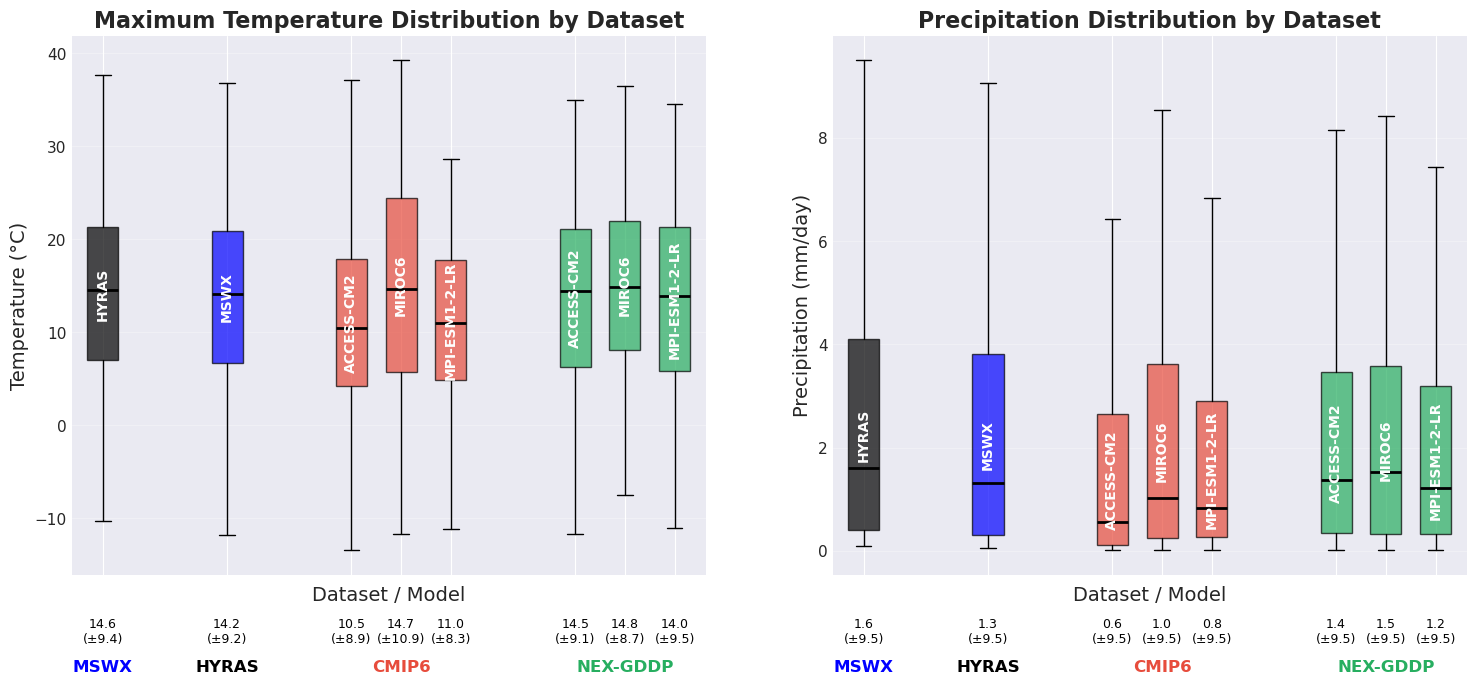

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Prepare data for boxplots with model tracking
def prepare_boxplot_data_with_labels(df):
    """Organize data by dataset type and model for grouped boxplot"""
    data_list = []
    labels_list = []
    colors_list = []
    positions_list = []
    
    pos = 1
    for source in sorted(df['source'].unique()):
        if source == 'MSWX':
            data_list.append(df[df['source'] == source]['value'].values)
            labels_list.append('MSWX')
            colors_list.append(dataset_colors['MSWX'])
            positions_list.append(pos)
            pos += 2  # Gap after MSWX
        elif source == 'HYRAS':
            data_list.append(df[df['source'] == source]['value'].values)
            labels_list.append('HYRAS')
            colors_list.append(dataset_colors['HYRAS'])
            positions_list.append(pos)
            pos += 2  # Gap after HYRAS
    
    # CMIP6 models
    for model in CMIP_MODELS:
        source = f'CMIP6_{model}'
        if source in df['source'].unique():
            data_list.append(df[df['source'] == source]['value'].values)
            labels_list.append(model)
            colors_list.append(dataset_colors['CMIP6'])
            positions_list.append(pos)
            pos += 0.8  # Closer spacing within group
    pos += 1.2  # Gap after CMIP6 group
    
    # NEX-GDDP models
    for model in CMIP_MODELS:
        source = f'NEXGDDP_{model}'
        if source in df['source'].unique():
            data_list.append(df[df['source'] == source]['value'].values)
            labels_list.append(model)
            colors_list.append(dataset_colors['NEXGDDP'])
            positions_list.append(pos)
            pos += 0.8  # Closer spacing within group
    
    return data_list, labels_list, colors_list, positions_list

# Prepare data
tasmax_data, tasmax_labels, tasmax_colors, tasmax_positions = prepare_boxplot_data_with_labels(df_tasmax)
# Filter out pr values < 0.01 mm/day
df_pr_filtered = df_pr[df_pr['value'] >= 0.01].copy()
pr_data, pr_labels, pr_colors, pr_positions = prepare_boxplot_data_with_labels(df_pr_filtered)

# Boxplot for tasmax
bp = axes[0].boxplot(tasmax_data, 
                     positions=tasmax_positions,
                     widths=0.5,
                     showfliers=False,
                     patch_artist=True,
                     medianprops=dict(color='black', linewidth=2))

# Color the boxes and add statistics
for i, (patch, color, data, label) in enumerate(zip(bp['boxes'], tasmax_colors, tasmax_data, tasmax_labels)):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
    # Calculate median and std dev
    median = np.median(data)
    std = np.std(data)
    
    # Add model name on the box (rotated 90 degrees)
    # Calculate middle of the box (between 25th and 75th percentile)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    y_mid = (q1 + q3) / 2
    axes[0].text(tasmax_positions[i], y_mid, label,
                ha='center', va='center', fontsize=10, fontweight='bold',
                color='white', rotation=90)
    
    # Add text annotation below the box
    axes[0].text(tasmax_positions[i], axes[0].get_ylim()[0] - (axes[0].get_ylim()[1] - axes[0].get_ylim()[0]) * 0.08,
                f'{median:.1f}\n(±{std:.1f})',
                ha='center', va='top', fontsize=9, color='black')

axes[0].set_title('Maximum Temperature Distribution by Dataset', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Dataset / Model', fontsize=14)
axes[0].set_ylabel('Temperature (°C)', fontsize=14)
axes[0].tick_params(axis='both', labelsize=11)
axes[0].set_xticks(tasmax_positions)
axes[0].set_xticklabels([''] * len(tasmax_labels))  # Hide x-axis labels since names are on boxes
axes[0].grid(True, alpha=0.3, axis='y')

# Add dataset group labels
axes[0].text(tasmax_positions[0], axes[0].get_ylim()[0] - (axes[0].get_ylim()[1] - axes[0].get_ylim()[0]) * 0.18,
            'MSWX', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['MSWX'])
axes[0].text(tasmax_positions[1], axes[0].get_ylim()[0] - (axes[0].get_ylim()[1] - axes[0].get_ylim()[0]) * 0.18,
            'HYRAS', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['HYRAS'])
axes[0].text(np.mean(tasmax_positions[2:5]), axes[0].get_ylim()[0] - (axes[0].get_ylim()[1] - axes[0].get_ylim()[0]) * 0.18,
            'CMIP6', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['CMIP6'])
axes[0].text(np.mean(tasmax_positions[5:8]), axes[0].get_ylim()[0] - (axes[0].get_ylim()[1] - axes[0].get_ylim()[0]) * 0.18,
            'NEX-GDDP', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['NEXGDDP'])

# Boxplot for pr
bp = axes[1].boxplot(pr_data, 
                     positions=pr_positions,
                     widths=0.5,
                     showfliers=False,
                     patch_artist=True,
                     medianprops=dict(color='black', linewidth=2))

# Color the boxes and add statistics
for i, (patch, color, data, label) in enumerate(zip(bp['boxes'], pr_colors, pr_data, pr_labels)):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
    # Calculate median and std dev
    median = np.median(data)
    # Calculate middle of the box (between 25th and 75th percentile)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    y_mid = (q1 + q3) / 2
    axes[1].text(pr_positions[i], y_mid, label,
                ha='center', va='center', fontsize=10, fontweight='bold',
                color='white', rotation=90)
    
    # Add text annotation below the box
    axes[1].text(pr_positions[i], axes[1].get_ylim()[0] - (axes[1].get_ylim()[1] - axes[1].get_ylim()[0]) * 0.08,
                f'{median:.1f}\n(±{std:.1f})',
                ha='center', va='top', fontsize=9, color='black')

axes[1].set_title('Precipitation Distribution by Dataset', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Dataset / Model', fontsize=14)
axes[1].set_ylabel('Precipitation (mm/day)', fontsize=14)
axes[1].tick_params(axis='both', labelsize=11)
axes[1].set_xticks(pr_positions)
axes[1].set_xticklabels([''] * len(pr_labels))  # Hide x-axis labels since names are on boxes
axes[1].grid(True, alpha=0.3, axis='y')

# Add dataset group labels
axes[1].text(pr_positions[0], axes[1].get_ylim()[0] - (axes[1].get_ylim()[1] - axes[1].get_ylim()[0]) * 0.18,
            'MSWX', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['MSWX'])
axes[1].text(pr_positions[1], axes[1].get_ylim()[0] - (axes[1].get_ylim()[1] - axes[1].get_ylim()[0]) * 0.18,
            'HYRAS', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['HYRAS'])
axes[1].text(np.mean(pr_positions[2:5]), axes[1].get_ylim()[0] - (axes[1].get_ylim()[1] - axes[1].get_ylim()[0]) * 0.18,
            'CMIP6', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['CMIP6'])
axes[1].text(np.mean(pr_positions[5:8]), axes[1].get_ylim()[0] - (axes[1].get_ylim()[1] - axes[1].get_ylim()[0]) * 0.18,
            'NEX-GDDP', ha='center', fontsize=12, fontweight='bold', color=dataset_colors['NEXGDDP'])


plt.show()

plt.tight_layout()
plt.show()